In [1]:
import numpy as np 
import pandas as pd 
from subprocess import check_output
tweets=pd.read_csv("dataset for task no 03.csv",encoding = "ISO-8859-1")
tweets.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,23-11-2016 18:40,False,NaN,8.014960e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,23-11-2016 18:40,False,NaN,8.014960e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,23-11-2016 18:40,False,NaN,8.014960e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,23-11-2016 18:39,False,NaN,8.014960e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,23-11-2016 18:39,False,NaN,8.014950e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from nltk import tokenize

sid = SentimentIntensityAnalyzer()

tweets['sentiment_compound_polarity']=tweets.text.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.text.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.text.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.text.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
tweets.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,...,statusSource,screenName,retweetCount,isRetweet,retweeted,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,23-11-2016 18:40,False,NaN,8.014960e+17,...,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False,0.1027,0.783,0.1,0.117,POSITIVE
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,23-11-2016 18:40,False,NaN,8.014960e+17,...,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False,0.0000,1.000,0.0,0.000,NEUTRAL
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,23-11-2016 18:40,False,NaN,8.014960e+17,...,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False,0.0000,1.000,0.0,0.000,NEUTRAL
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,23-11-2016 18:39,False,NaN,8.014960e+17,...,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False,0.0000,1.000,0.0,0.000,NEUTRAL
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,23-11-2016 18:39,False,NaN,8.014950e+17,...,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False,0.0000,1.000,0.0,0.000,NEUTRAL


<Axes: title={'center': 'sentiment\xa0analysis'}>

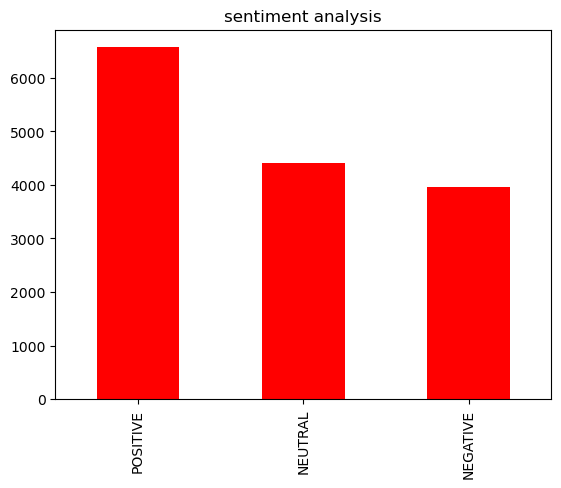

In [3]:
tweets.sentiment_type.value_counts().plot(kind='bar',color='red',title="sentiment analysis")

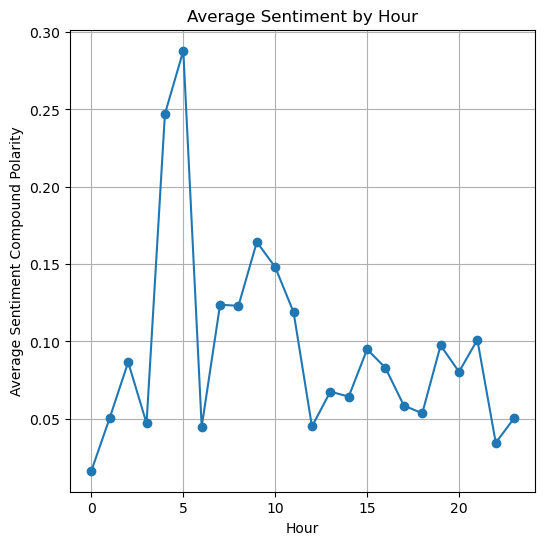

In [4]:
import matplotlib.pyplot as plt

tweets['hour'] = pd.DatetimeIndex(tweets['created']).hour
df = tweets.groupby('hour', as_index=False)['sentiment_compound_polarity'].mean()

plt.figure(figsize=(6, 6))
plt.plot(df['hour'], df['sentiment_compound_polarity'], marker='o')
plt.xlabel('Hour')
plt.ylabel('Average Sentiment Compound Polarity')
plt.title('Average Sentiment by Hour')
plt.grid(True)  # Corrected to use True instead of true
plt.show()
